# Importando 

In [ ]:
import os
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager


# Raspagem de dados

# Todos da serie A 

In [ ]:


# Temporadas e URLs correspondentes
temporadas_urls = {
    "2025": "https://www.transfermarkt.com.br/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2024",
    "2024": "https://www.transfermarkt.com.br/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2023",
    "2023": "https://www.transfermarkt.com.br/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2022",
    "2022": "https://www.transfermarkt.com.br/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2021",
    "2021": "https://www.transfermarkt.com.br/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2020",
    "2020": "https://www.transfermarkt.com.br/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2019"
}

# Setup navegador headless
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Pasta para salvar os arquivos
pasta = "Todos_serieA"
os.makedirs(pasta, exist_ok=True)


for temporada, url in temporadas_urls.items():
    print(f"Coletando dados da temporada {temporada}...")
    driver.get(url)
    time.sleep(5)

    soup = BeautifulSoup(driver.page_source, "html.parser")
    table = soup.find("table", class_="items")

    clubes_data = []
    if table:
        rows = table.find_all("tr", class_=["odd", "even"])
        for row in rows:
            cols = row.find_all("td")
            if len(cols) >= 7:
                clube = cols[1].text.strip()
                plantel = cols[2].text.strip()
                idade_media = cols[3].text.strip()
                estrangeiros = cols[4].text.strip()
                valor_medio = cols[5].text.strip()
                valor_total = cols[6].text.strip()

                clubes_data.append({
                    "Clube": clube,
                    "Plantel": plantel,
                    "ø Idade": idade_media,
                    "Estrangeiros": estrangeiros,
                    "ø Valor de Mercado": valor_medio,
                    "Valor de Mercado Total": valor_total
                })

    df = pd.DataFrame(clubes_data)
    df.to_csv(os.path.join(pasta, f"valores_{temporada}.csv"), index=False, encoding="utf-8-sig")

    print(f"Temporada {temporada} finalizada com {len(df)} clubes.")

driver.quit()


Coletando dados da temporada 2025...
Temporada 2025 finalizada com 20 clubes.
Coletando dados da temporada 2024...
Temporada 2024 finalizada com 20 clubes.
Coletando dados da temporada 2023...
Temporada 2023 finalizada com 20 clubes.
Coletando dados da temporada 2022...
Temporada 2022 finalizada com 20 clubes.
Coletando dados da temporada 2021...
Temporada 2021 finalizada com 20 clubes.
Coletando dados da temporada 2020...
Temporada 2020 finalizada com 20 clubes.


# Todos juntos

In [36]:
import os
import pandas as pd


pasta = "Todos_serieA"
arquivos = [arq for arq in os.listdir(pasta) if arq.endswith(".csv")]


dfs = []


for arquivo in arquivos:
    temporada = arquivo.split("_")[1].split(".")[0]  
    df = pd.read_csv(os.path.join(pasta, arquivo))
    df["Temporada"] = temporada
    dfs.append(df)


df_final = pd.concat(dfs, ignore_index=True)


df_final.to_csv("todos_clubes_serieA.csv", index=False, encoding="utf-8-sig")

print("Arquivo 'todos_clubes_serieA.csv' criado com sucesso!")


Arquivo 'todos_clubes_serieA.csv' criado com sucesso!


# Transformando o arquivo xlsx em CSV 
* (O arquvio contém os dados dos valores do clube + pontos por temporada que foi feito no próprio excel com a formula procv) 
* Estando na aba 'Crud' la foi feito a organização dos dados para colocar na aba principal "todos_clubes_serieA"

In [ ]:
import pandas as pd


caminho_excel = r"C:\Users\lLuca\OneDrive\Documentos\Leo_estudos\Faculdade\alessio\Previsao_DePontosBrasileirao-SerieA\Previsao_DePontosBrasileirao-SerieA\dados\valor_de_clube_por_temporada_com_pontos.xlsx"


df = pd.read_excel(caminho_excel, sheet_name="todos_clubes_serieA")


caminho_csv = r"C:\Users\lLuca\OneDrive\Documentos\Leo_estudos\Faculdade\alessio\Previsao_DePontosBrasileirao-SerieA\Previsao_DePontosBrasileirao-SerieA\dados\todos_clubes_serieA_com_pontos.csv"
df.to_csv(caminho_csv, index=False)

print("CSV salvo com sucesso!")




CSV salvo com sucesso!


# Correlação e R²

In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


caminho_csv = r'C:\Users\lLuca\OneDrive\Documentos\Leo_estudos\Faculdade\alessio\Previsao_DePontosBrasileirao-SerieA\Previsao_DePontosBrasileirao-SerieA\dados\todos_clubes_serieA_com_pontos.csv'
df = pd.read_csv(caminho_csv)
df.columns = [col.strip() for col in df.columns]

# Filtrando dados até 2024
df_treino = df[df['Temporada'] < 2025]

# Correlação entre Valor de Mercado Total e Pontos
correlacao = df_treino[['Valor de Mercado Total', 'Pontos']].corr().iloc[0, 1]
print(f'Correlação entre Valor de Mercado Total e Pontos: {correlacao:.4f}')

# Regressão linear
X_train = df_treino[['Valor de Mercado Total']]
y_train = df_treino['Pontos']
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# R²
y_pred_train = modelo.predict(X_train)
r2 = r2_score(y_train, y_pred_train)
print(f'R² do modelo: {r2:.4f}')


Correlação entre Valor de Mercado Total e Pontos: 0.5829
R² do modelo: 0.3398


# Grafico de Correlção e R²

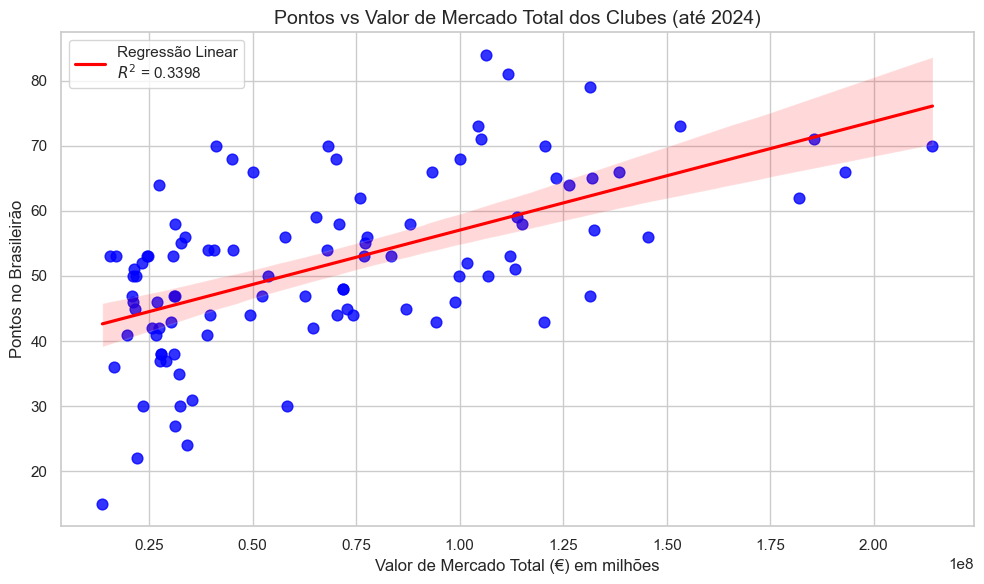

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo do gráfico
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.regplot(
    x='Valor de Mercado Total',
    y='Pontos',
    data=df_treino,
    scatter_kws={'color': 'blue', 's': 60},
    line_kws={'color': 'red', 'label': f'Regressão Linear\n$R^2$ = {r2:.4f}'}
)

plt.title('Pontos vs Valor de Mercado Total dos Clubes (até 2024)', fontsize=14)
plt.xlabel('Valor de Mercado Total (€) em milhões', fontsize=12)
plt.ylabel('Pontos no Brasileirão', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


# Tabela de previsão

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from tabulate import tabulate


caminho_csv = r'C:\Users\lLuca\OneDrive\Documentos\Leo_estudos\Faculdade\alessio\Previsao_DePontosBrasileirao-SerieA\Previsao_DePontosBrasileirao-SerieA\dados\todos_clubes_serieA_com_pontos.csv'
df = pd.read_csv(caminho_csv)
df.columns = [col.strip() for col in df.columns]


df_treino = df[df['Temporada'] < 2025].copy()
df_2025 = df[df['Temporada'] == 2025].copy()

# Modelo
X_train = df_treino[['Valor de Mercado Total']]
y_train = df_treino['Pontos']
modelo = LinearRegression()
modelo.fit(X_train, y_train)


X_2025 = df_2025[['Valor de Mercado Total']]
y_pred_2025 = modelo.predict(X_2025)

# Adiciona os resultados ao DataFrame
df_2025['Pontos Previstos'] = y_pred_2025


print(tabulate(df_2025[['Clube', 'Valor de Mercado Total', 'Pontos Previstos']],
               headers='keys',
               tablefmt='fancy_grid',
               showindex=False))



╒══════════════════╤══════════════════════════╤════════════════════╕
│ Clube            │   Valor de Mercado Total │   Pontos Previstos │
╞══════════════════╪══════════════════════════╪════════════════════╡
│ SE Palmeiras     │               2.3875e+08 │            80.2295 │
├──────────────────┼──────────────────────────┼────────────────────┤
│ CR Flamengo      │               2.1915e+08 │            76.9553 │
├──────────────────┼──────────────────────────┼────────────────────┤
│ Botafogo FR      │               1.3595e+08 │            63.0568 │
├──────────────────┼──────────────────────────┼────────────────────┤
│ SC Corinthians   │               1.2325e+08 │            60.9352 │
├──────────────────┼──────────────────────────┼────────────────────┤
│ SC Internacional │               1.0665e+08 │            58.1622 │
├──────────────────┼──────────────────────────┼────────────────────┤
│ Santos FC        │               9.56e+07   │            56.3163 │
├──────────────────┼──────────────

# Grafico de Previsão de Pontos

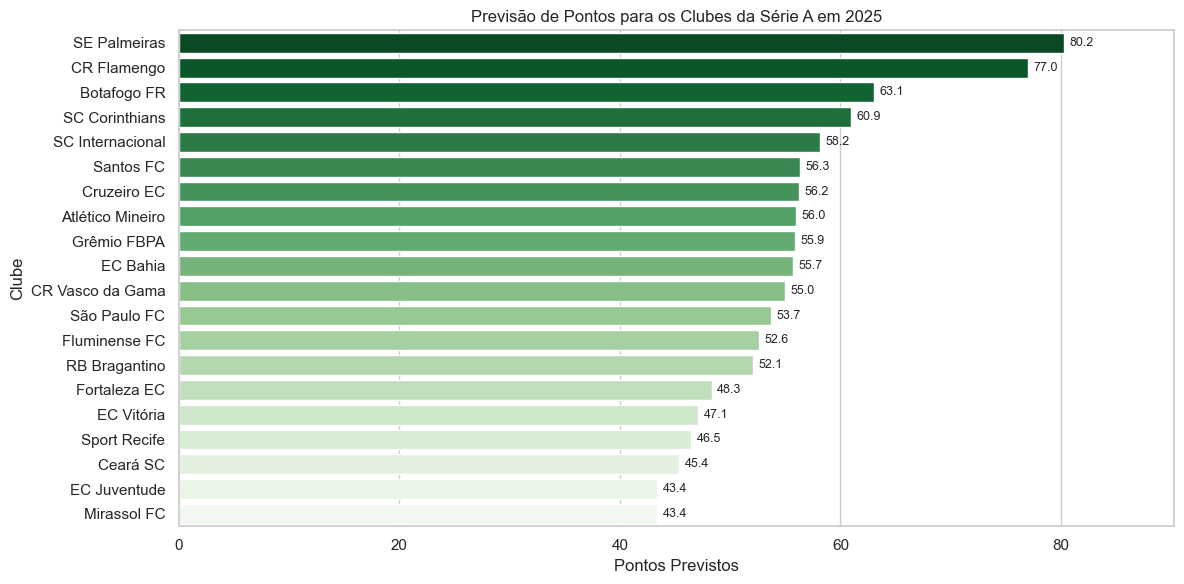

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df_2025.sort_values('Pontos Previstos', ascending=False).reset_index(drop=True)
palette = sns.color_palette("Greens", len(df_plot))[::-1]

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_plot, x='Pontos Previstos', y='Clube', hue='Clube', palette=palette, legend=False)

for p in ax.patches:
    ax.text(p.get_width() + 0.5, p.get_y() + p.get_height()/2, f'{p.get_width():.1f}', va='center', fontsize=9)

plt.title('Previsão de Pontos para os Clubes da Série A em 2025')
plt.xlabel('Pontos Previstos')
plt.ylabel('Clube')
plt.xlim(0, df_plot['Pontos Previstos'].max() + 10)
plt.tight_layout()
plt.show()


